# 삼성전자 ML 이해 및 구현 파이널 프로젝트
# 반도체 공정 데이터를 바탕으로 한 분류 모델링 및 공정분석
> - 데이터셋 설명  
>> UCI SECOM 반도체 공정 데이터셋  
데이터 출처 [https://archive.ics.uci.edu/ml/datasets/SECOM](https://archive.ics.uci.edu/ml/datasets/SECOM)  
총 1576샘플, 590개 공정데이터를 컬럼 값으로 갖는 데이터 및 1576개의 완제품의 불량 여부 레이블 데이터가 존재.  
전처리 된 불량 여부 레이블은 정상데이터는 0, 불량데이터는 1이다.  
각 컬럼은 반도체 생산 공정 설비에서 수집된 데이터이며 2008년 7월 19일부터 2008년 10월 17일에 걸쳐 수집 된 데이터이다.

> - 목적
>> 단순 완제품 불량 여부 분류를 위한 머신러닝 분류 모델링이 목적이 아님.  
머신러닝 모델이 어떠한 공정데이터(컬럼)가 불량 판별에 가장 영향을 많이 준 공정인지를 파악하는 목적으로 진행한다.  
이를 바탕으로 불량에 가장 많은 영향을 주는 공정을 파악하고 예지보전을 통해 완제품 수율개선에 기여할 수 있다.  

> - 진행방식
>> 아래 굵은 글씨로 작성 되어있는 테스트를 수행하며 테스크 아래 수행 결과값과 비교하며 프로젝트를 진행한다.  
코드 실행 결과값이 없을 경우 # 결과값 없음, 코드 실행 결과가 결과값이랑 다를 수 있는 경우 # 결과값 다를 수 있음으로 가늠한다.

## 필요모듈 import 

In [1]:
# 분석에 필요한 모듈을 import 합니다.

# 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns=600
pd.options.display.max_info_columns=600

# CODE HERE
import seaborn as sns
pd.options.display.max_columns=600
pd.options.display.max_info_columns=600

## 데이터 로딩 및 확인

**함께 제공 된 semiconductor.csv 파일을 읽어들여 df로 저장**  
원본데이터는 X, y 각각 링크형태로 제공하지만 편의를 위해 강사가 전처리를 진행한 데이터셋을 활용

In [2]:
# CODE HERE
df = pd.read_csv('./data/semiconductor.csv')

In [3]:
# 윗 CODE 실행 출력값 없음

**df의 첫 5개 샘플 확인**

In [4]:
# CODE HERE
df.head()


,datetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,target
0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0

**데이터의 기초통계량 확인**

In [5]:
# CODE HERE
df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,target
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,1543.000000,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.000000,1566.000000,1566.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1560.000000,1561.000000,1561.000000,1561.000000,1560.000000,1560.000000,1560.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.000000,773.000000,773.000000,1561.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1566.000000,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.00000,1561.000000,1561.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.000000,549.000000,549.000000,549.000000,852.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1543.000000,1567.000000,1567.000000,1558.000000,1558.00000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1559.000000,1559.000000,1559.000000,1562.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0000

**데이터프레임의 간략한 정보 확인**

In [6]:
# CODE HERE
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 592 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    datetime  1567 non-null   object 
 1    0         1561 non-null   float64
 2    1         1560 non-null   float64
 3    2         1553 non-null   float64
 4    3         1553 non-null   float64
 5    4         1553 non-null   float64
 6    5         1553 non-null   float64
 7    6         1553 non-null   float64
 8    7         1558 non-null   float64
 9    8         1565 non-null   float64
 10   9         1565 non-null   float64
 11   10        1565 non-null   float64
 12   11        1565 non-null   float64
 13   12        1565 non-null   float64
 14   13        1564 non-null   float64
 15   14        1564 non-null   float64
 16   15        1564 non-null   float64
 17   16        1564 non-null   float64
 18   17        1564 non-null   float64
 19   18        1564 non-null   float64
 20   19    

**위의 간단한 함수로서 확인 한 데이터의 특징을 자유롭게 기술해봅시다.**

In [7]:
# TEXT HERE
# datetime column외에 설명변수는 모두 연속형 변수이고 대부분의 컬럼이 결측치를 포함하고 있다.

## 타겟데이터 분포 및 결측치 확인

이번 프로젝트의 y값인 완성품의 불량여부는 데이터셋의 'target' 컬럼입니다. 해당 데이터의 구조적 특징을 살펴보겠습니다.

**타겟데이터의 고윳값 확인**

In [8]:
# CODE HERE
df['target'].unique()


array([0, 1], dtype=int64)

양품데이터는 0, 불량데이터는 1로 전처리가 되어있음을 확인했습니다. 정상데이터와 불량데이터의 비율을 확인해보겠습니다.

**양품 데이터 갯수 및 불량 데이터 갯수 확인**

In [9]:
# CODE HERE
df['target'].value_counts()


0    1463
1     104
Name: target, dtype: int64

비율로 확인해본 결과 불량데이터의 수가 절대적으로 부족합니다. 현업 문제에서는 굉장히 빈번하게 발생하는 문제입니다.  
앞으로 수행할 모델링에도 임발란스 한 타겟데이터가 모델링을 힘들게 할 수 있습니다. 이는 어떻게 처리할지 생각해 보아야 할 문제입니다.

**sns.heatmap() 함수를 활용하여 정상/불량 데이터의 각각의 결측치를 시각화 해 봅니다.**  
**plt.subplot은 시각화 공간을 설정한 행렬 기준으로 나누어 주는 함수입니다. 위는 정상데이터 아래는 불량데이터입니다.**  
**결측치 유무에 따른 불량발생 패턴이 있는지 확인하고자 시각화를 진행합니다.**  
**제공된 코드에 사이 CODE HERE 란을 채워넣어 아래 결과값과 같은 출력을 만들어 봅시다.** 

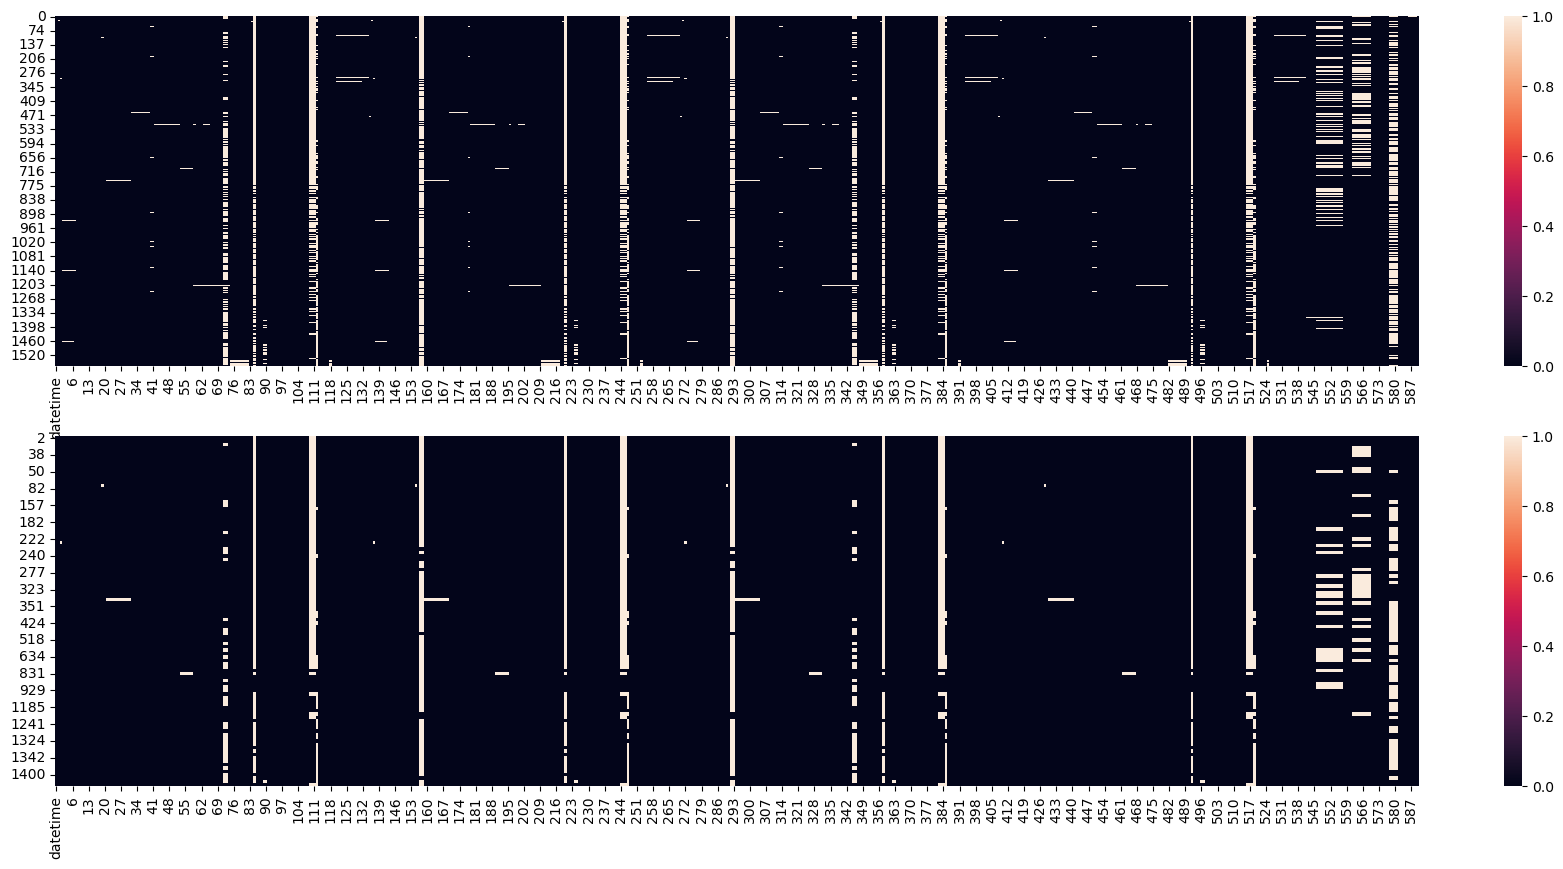

In [10]:
plt.figure(figsize=(22, 10))
plt.subplot(2, 1, 1)

# CODE HERE
df_ok = df[df['target']==0]
sns.heatmap(df_ok.isna())

plt.subplot(2, 1, 2)
# CODE HERE
df_ng = df[df['target']==1]
sns.heatmap(df_ng.isna())

plt.show()

**위의 시각화를 통해 결측치의 분포로 알 수 있는 내용을 기술 해봅시다.**

In [11]:
# TEXT HERE
# 각 컬럼의 결측치의 분포는 양품 여부와 관련이 없다고 볼 수 있다.

## 모델 선택과 전처리

**살펴본 데이터셋과 분석 목적에 따라 머신러닝 모델링을 해야 한다면 어떤 모델을 선택해야 하는가?**  

In [12]:
# TEXT HERE
# 양품/불량 여부를 판별하는 분석으로 분류모델을 사용해야하고, 설명 변수의 개수가 샘플 수에 비해 너무 많으므로 L2 패널티를 적용해야 한다.

일반적인 머신러닝 모델의 경우 데이터셋에 결측치가 존재하면 모델 학습에 사용이 불가능하기에 결측치를 다양한 방법으로 처리합니다.  

**각 컬럼의 결측치 비율이 50%를 넘어가는 컬럼과 datetime 컬럼을 제외한 나머지 컬럼만을 데이터셋에 사용하겠습니다.**

In [13]:
# CODE HERE
# 기존 데이터 shape 확인
df.shape

(1567, 592)

  ***1) 분석 편의를 위해 datetime 컬럼을 먼저 삭제 하도록 하겠습니다.***

In [14]:
# CODE HERE
df.drop('datetime', axis=1, inplace=True)


In [15]:
# 윗 CODE 실행 출력값 없음

***2) 컬럼명으로 각 컬럼값에 접근 결측치 수를 확인 후 전체 데이터의 50% 이하라면 리스트로 생성합니다.***

In [16]:
# CODE HERE
col_list = []
for col in df.columns :
    if df[col].isna().sum() / len(df) * 100 < 50 :
        col_list.append(col)

In [17]:
# 윗 CODE 실행 출력값 없음

***3) 만든 리스트의 갯수를 세도록 하겠습니다.***

In [18]:
# CODE HERE
len(col_list)


563

**선별한 컬럼 리스트를 사용해 df데이터프레임에 전달하여 선택한 컬럼을 df원본값으로 변경 해주겠습니다.**

In [19]:
# CODE HERE
for col in df.columns :
    if col not in col_list:
        df.pop(col)

In [20]:
# 윗 CODE 실행 출력값 없음

In [21]:
# CODE HERE
# 결측치 처리 후 shape확인
df.shape

(1567, 563)

In [22]:
#결측치 채워넣기 전 
# CODE HERE
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,target
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.0400,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,0.0,2.5883,0.0010,0.0319,0.0197,0.0120,0.0109,3.9321,0.0,1.5123,3.5811,0.1337,0.0055,3.8447,0

**컬럼명을 순환하면서 각 컬럼 데이터에 접근하고 컬럼의 결측치 값을 컬럼 평균값으로 채워 넣겠습니다.**

In [23]:
# CODE HERE
for col in df.columns :
    df[col].fillna(df[col].mean(), inplace=True)


In [24]:
# 윗 CODE 실행 출력값 없음

In [25]:
# 결측치 채워넣은 후
# CODE HERE
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,target
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,-0.003400,0.945500,202.439600,0.0,7.955800,414.871000,10.043300,0.968000,192.396300,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,0.0,0.012600,-0.02060,0.014100,-0.030700,-0.008300,-0.002600,-0.056700,-0.004400,7.2163,0.1320,2.3895,0.9690,1747.6049,0.184100,8671.930100,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,0.457538,0.9460,0.0,748.6115,0.9908,58.4306,0.600200,0.9804,6.3788,15.880000,2.63900,15.94000,15.930000,0.865600,3.353000,0.409800,3.188000,-0.047300,0.724300,0.996000,2.296700,1000.726300,39.237300,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.089800,0.085000,0.03580,0.032800,12.256600,0.0,4.271000,10.284000,0.473400,0.016700,11.890100,0.41,0.0506,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.0400,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.077200,0.059900,0.070000,0.054700,0.070400,0.052000,0.030100,0.113500,3.4789,0.0010,0.0707,0.0211,175.2173,0.03150,1940.399400,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,0.053374,0.0188,0.0,219.9453,0.0011,2.8374,0.018900,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047200,40.855000,4.515200,30.981

**결측치를 채워넣은 df을 전달하여 heatmap 확인**

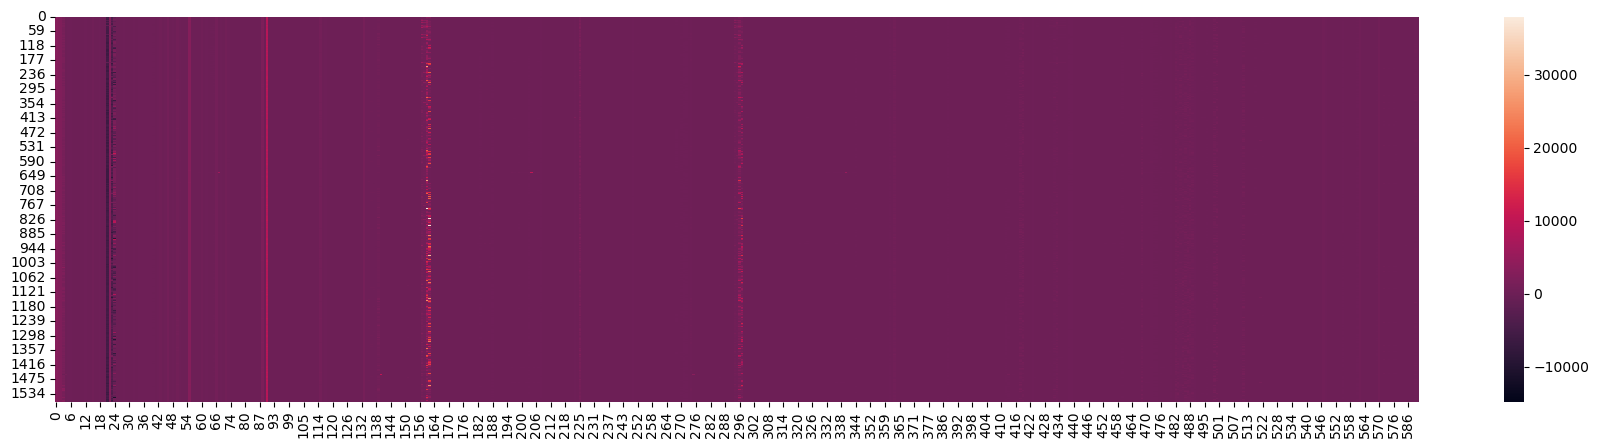

In [26]:
plt.figure(figsize=(22, 5))
# CODE HERE
sns.heatmap(df)

plt.show()

## 타겟데이터 분리 및 학습데이터 생성

**타겟데이터를 분리하여 y 변수에, 설명변수 데이터를 분리하여 X변수에 저장합니다.**

In [27]:
# CODE HERE
y = df['target']
X = df.drop('target', axis=1)

In [28]:
# 윗 CODE 실행 출력값 없음

**지도학습 모델 학습을 위한 학습/테스트 데이터셋을 분할해주겠습니다.**  
**현재 타겟데이터인 y값의 클래스가 불균형 한 상태입니다. 이를 보완할 수 있게 파라메터 설정이 필요합니다.**  
**단, 테스트데이터 비율은 30%, random_state=42으로 고정할 수 있게 파라메터 설정도 함께 해주세요.**

In [29]:
# CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [30]:
# 윗 CODE 실행 출력값 없음

## 모델생성, 학습, 평가
**지금까지 살펴본 데이터의 특성 및 기획 단계에서 정의 한 문제를 해결하기 위한 적절한 모델 선택이 필요합니다.**  
**가장 간단한 모델을 baseline 모델 삼아 모델링을 진행 한 후 이후에는 baseline 모델 보다 개선 된 모델을 만드는 것을 목표로 합니다.**

**baseline 모델 생성**  
해당 문제를 해결하기 위한 가장 간단한 모델을 생성하여 기준모델로 삼아보겠습니다.  
이진분류 문제이기에 Logistic regression을 baseline 모델로 삼아 모델링을 진행해보겠습니다.

In [31]:
# CODE HERE 모델 생성
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [32]:
# 윗 CODE 실행 출력값 없음

**모델 학습**

In [33]:
# CODE HERE
lr.fit(X_train, y_train)


LogisticRegression()

In [34]:
# 윗 CODE 실행 출력값 없음

**모델 평가를 위한 예측 결과값 저장**

In [35]:
# CODE HERE
lr_pred = lr.predict(X_test)


In [36]:
# 윗 CODE 실행 결과값 없음

**분류 모델 평가지표 confusion matrix, classification_report 출력**

In [37]:
# CODE HERE
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

[[439   1]
 [ 31   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [38]:
# 결과값 다를 수 있음

## 모델 평가지표 해석 및 개선 방향 설정

**모델 평가지표를 해석해봅시다. accuracy가 93%로 높은 정확도를 보이고 있지만 개선이 필요해 보입니다.**  
**왜 개선이 필요한지, 프로젝트 목적에 따라 어떤 방향으로 개선해야 할지 기술해 봅시다.**

In [39]:
목적
단순 완제품 불량 여부 분류를 위한 머신러닝 분류 모델링이 목적이 아님.
머신러닝 모델이 어떠한 공정데이터(컬럼)가 불량 판별에 가장 영향을 많이 준 공정인지를 파악하는 목적으로 진행한다.
이를 바탕으로 불량에 가장 많은 영향을 주는 공정을 파악하고 예지보전을 통해 완제품 수율개선에 기여할 수 있다.

SyntaxError: invalid syntax (3631867570.py, line 2)

In [ ]:
# TEXT HERE
'''
confusion matrix를 통해 실제로 불량인 제품을 양품으로 분류한 경우가 전체 데이터 471건 중 31건이나 발생한 것을 확인할 수 있는데, 
이러한 경우 risk가 크기 때문에 개선이 필요하다.
예지보전을 통해 완제품 수율개선에 기여할 수 있도록 불량품의 recall을 높이는 방향으로 모델을 개선해야 한다.
'''

## 모델 개선 / 파라미터 서칭
위 평가지표 및 목적에 따라 모델 과 파라미터 서칭을 통해 데이터셋에 최적인 모델을 찾는 과정을 진행하겠습니다.  
모델 개선은 위 디폴트 모델의 baseline 모델보다 개선해야할 평가지표를 높이는 방향으로 모델 개선을 하도록 하겠습니다.  
남은 시간동안 모델 개선을 통해 프로젝트 목적에 맞는 모델을 만드는것을 목표로 합니다.  

**파라메터 서칭 코드를 사용하여 가장 알맞은 treebase 모델과 파라미터를 찾습니다.**  
**다양한 모델 및 파라미터를 사용하여 위에서 설정한 baseline 모델보다 개선해 봅시다.**

**Decision Tree모델을 사용한 최적모델 탐색 단순 반복문으로 파라메터 서칭을 수행 해봅니다.**  
**파라메터 서칭을 위한 검증데이터인 validation 데이터 분할을 수행합니다.**

In [40]:
# CODE HERE
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [41]:
# 윗 CODE 실행 출력값 없음

**Decision Tree모델의 최적 파라메터 서칭을 자유롭게 진행해봅시다. 아래 출력 결과물은 다를 수 있습니다.**

In [42]:
# DecisionTree 파라미터 서치
# CODE HERE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, precision_score, recall_score

depth = [3, 5, 7, 9, 11]

best_param = None
best_score = -999999999

for d in depth:
    model = DecisionTreeClassifier(max_depth = d, random_state=1004)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    precision = precision_score(y_val, y_pred)   
    recall = recall_score(y_val, y_pred)               # 불량품에 대한 recall => 높이는 방향으로 모델 개선
    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)
#     print(d, precision, recall, '\n', cm, '\n', cr)
    if (best_score < recall):
        best_score = recall
        best_param = d
    
    print(best_param, best_score)
    

3 0.04
3 0.04
7 0.08
9 0.2
9 0.2


In [43]:
# 모델 평가지표 출력
# CODE HERE

best_dt = DecisionTreeClassifier(max_depth = 9, random_state=1004)
best_dt.fit(X_train, y_train)
best_dt_pred = best_dt.predict(X_test)
score = recall_score(y_test, best_dt_pred)   
cm = confusion_matrix(y_test, best_dt_pred)
cr = classification_report(y_test, best_dt_pred)
print(score,'\n', cm, '\n', cr)


0.0967741935483871 
 [[427  13]
 [ 28   3]] 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       440
           1       0.19      0.10      0.13        31

    accuracy                           0.91       471
   macro avg       0.56      0.53      0.54       471
weighted avg       0.89      0.91      0.90       471



머신러닝 모델링을 위해서는 사용가능 한 모든 모델에 대한 모델 서칭도 필요합니다.  
**아래에는 Random Forest, XGBoost 파라메터 서칭도 진행 해보겠습니다.**

In [44]:
# RandomForest 파라미터 서치
# CODE HERE
from sklearn.ensemble import RandomForestClassifier
from itertools import product

est = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]    # 보통 100단위
depth = [3, 5, 7, 9, 11]               # 보통 홀수 기준
grid = list(product(est, depth))

best_param = None
best_score = -999999999  
for param in grid:
    print(f'{param} 서칭중')
    model = RandomForestClassifier(n_estimators=param[0], max_depth=param[1], random_state=1004)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = recall_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)
    print(param, score, '\n', cm, '\n', cr)
#     if best_score < score:
#         best_score = score
#         best_param = param
    
#     print(best_param, best_score)

(100, 3) 서칭중
(100, 3) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy                           0.92       329
   macro avg       0.46      0.50      0.48       329
weighted avg       0.85      0.92      0.89       329

(100, 5) 서칭중
(100, 5) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy                           0.92       329
   macro avg       0.46      0.50      0.48       329
weighted avg       0.85      0.92      0.89       329

(100, 7) 서칭중
(100, 7) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy           

(500, 7) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy                           0.92       329
   macro avg       0.46      0.50      0.48       329
weighted avg       0.85      0.92      0.89       329

(500, 9) 서칭중
(500, 9) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy                           0.92       329
   macro avg       0.46      0.50      0.48       329
weighted avg       0.85      0.92      0.89       329

(500, 11) 서칭중
(500, 11) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy                      

(900, 11) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy                           0.92       329
   macro avg       0.46      0.50      0.48       329
weighted avg       0.85      0.92      0.89       329

(1000, 3) 서칭중
(1000, 3) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy                           0.92       329
   macro avg       0.46      0.50      0.48       329
weighted avg       0.85      0.92      0.89       329

(1000, 5) 서칭중
(1000, 5) 0.0 
 [[304   0]
 [ 25   0]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       304
           1       0.00      0.00      0.00        25

    accuracy                   

In [45]:
# 데이터 불균형 해결
from imblearn.over_sampling import SMOTE
smote = SMOTE()
over_X_train, over_y_train = smote.fit_resample(X_train, y_train)
over_X_test, over_y_test = smote.fit_resample(X_test, y_test)


In [46]:
y_train.value_counts(), over_y_train.value_counts(), y_test.value_counts(), over_y_test.value_counts()

(0    719
 1     48
 Name: target, dtype: int64,
 0    719
 1    719
 Name: target, dtype: int64,
 0    440
 1     31
 Name: target, dtype: int64,
 0    440
 1    440
 Name: target, dtype: int64)

In [47]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(over_X_train, over_y_train, test_size=0.3, random_state=42)

In [48]:
# oversampling한 데이터로 다시 파라미터 서칭

est = [100, 200, 300]    # 보통 100단위
depth = [3, 5, 7, 9]               # 보통 홀수 기준
grid = list(product(depth, est))

best_param = None
best_score = -999999999  
for param in grid:
    print(f'{param} 서칭중')
    model = RandomForestClassifier(n_estimators=param[1], max_depth=param[0], random_state=42)
    model.fit(X_train2, y_train2)
    y_pred = model.predict(X_val2)
    score = recall_score(y_val2, y_pred)
    cm = confusion_matrix(y_val2, y_pred)
    cr = classification_report(y_val2, y_pred)
#     print(param, score, '\n', cm, '\n', cr)
    if best_score < score:
        best_score = score
        best_param = param
    
    print(best_param, best_score)

(3, 100) 서칭중
(3, 100) 0.9398148148148148
(3, 200) 서칭중
(3, 200) 0.9629629629629629
(3, 300) 서칭중
(3, 200) 0.9629629629629629
(5, 100) 서칭중
(5, 100) 0.9768518518518519
(5, 200) 서칭중
(5, 200) 0.9814814814814815
(5, 300) 서칭중
(5, 200) 0.9814814814814815
(7, 100) 서칭중
(7, 100) 0.9861111111111112
(7, 200) 서칭중
(7, 100) 0.9861111111111112
(7, 300) 서칭중
(7, 100) 0.9861111111111112
(9, 100) 서칭중
(9, 100) 0.9907407407407407
(9, 200) 서칭중
(9, 100) 0.9907407407407407
(9, 300) 서칭중
(9, 100) 0.9907407407407407


In [49]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42)
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)
score = recall_score(y_test, best_rf_pred)   
cm = confusion_matrix(y_test, best_rf_pred)
cr = classification_report(y_test, best_rf_pred)
print(score,'\n', cm, '\n', cr)

0.0 
 [[440   0]
 [ 31   0]] 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [50]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42)
best_rf.fit(over_X_train, over_y_train)
best_rf_pred = best_rf.predict(over_X_test)
score = recall_score(over_y_test, best_rf_pred)   
cm = confusion_matrix(over_y_test, best_rf_pred)
cr = classification_report(over_y_test, best_rf_pred)
print(score,'\n', cm, '\n', cr)

0.30227272727272725 
 [[438   2]
 [307 133]] 
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       440
           1       0.99      0.30      0.46       440

    accuracy                           0.65       880
   macro avg       0.79      0.65      0.60       880
weighted avg       0.79      0.65      0.60       880



**gridsearch를 활용하여 XGBoost 모델의 파라메터 서칭도 진행 해보겠습니다.**

In [56]:
# XGBoost 그리드 서치
# CODE HERE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRFClassifier

xgb = XGBClassifier()

params = {
    'max_depth' : [3, 5],
    'subsample' : [0.6],
    'colsample_bytree' : [0.6, 0.8],
    'n_estimators' : [100, 300],
    'learning_rate' : [0.003, 0.03]
}

grid = GridSearchCV(estimator = xgb,
                   param_grid = params,
                   scoring = 'neg_root_mean_squared_error',
                   verbose = 2,
                   cv = 5)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=300, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=300, subsample=0.6; total time=   1.7s
[CV]

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [57]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.003, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 {'colsample_bytree': 0.6,
  'learning_rate': 0.003,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 0.6},
 -0.25007468755854967)

In [55]:
# 최적의 모델 평가지표 
best_xgb = XGBClassifier(colsample_bytree = 0.6,
                          learning_rate = 0.003,
                          max_depth = 3,
                          n_estimators = 100,
                          subsample = 0.6)

best_xgb.fit(X_train, y_train)
best_xgb_pred = best_dt.predict(X_test)
score = recall_score(y_test, best_xgb_pred)    # 불량품에 대한 recall => 높이는 방향으로 모델 개선
cm = confusion_matrix(y_test, best_xgb_pred)
cr = classification_report(y_test, best_xgb_pred)
print(score,'\n', cm, '\n', cr)

0.0967741935483871 
 [[427  13]
 [ 28   3]] 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       440
           1       0.19      0.10      0.13        31

    accuracy                           0.91       471
   macro avg       0.56      0.53      0.54       471
weighted avg       0.89      0.91      0.90       471



In [58]:
# 오버샘플링한 데이터로 다시
xgb = XGBClassifier()

params = {
    'max_depth' : [3, 5],
    'subsample' : [0.6],
    'colsample_bytree' : [0.6, 0.8],
    'n_estimators' : [100, 300],
    'learning_rate' : [0.003, 0.03]
}

grid = GridSearchCV(estimator = xgb,
                   param_grid = params,
                   scoring = 'neg_root_mean_squared_error',
                   verbose = 2,
                   cv = 5)

grid.fit(over_X_train, over_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.7s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.7s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=300, subsample=0.6; total time=   2.6s
[CV

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.6; total time=   5.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.6; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.6; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estima

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [59]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.03, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03,
  'max_depth': 5,
  'n_estimators': 300,
  'subsample': 0.6},
 -0.07788819574375387)

In [ ]:
best_xgb = XGBClassifier(colsample_bytree = 0.6,
                          learning_rate = 0.03,
                          max_depth = 5,
                          n_estimators = 300,
                          subsample = 0.6)

best_xgb.fit(X_train, y_train)
best_xgb_pred = best_dt.predict(X_test)
score = recall_score(y_test, best_xgb_pred)    # 불량품에 대한 recall => 높이는 방향으로 모델 개선
cm = confusion_matrix(y_test, best_xgb_pred)
cr = classification_report(y_test, best_xgb_pred)
print(score,'\n', cm, '\n', cr)

In [ ]:
print('결과 값 다를 수 있음 ')

## 모델 중요도 시각화 및 결론 도출

**위의 모델 서칭 및 파라메터 서칭이 완료 된 모델 중 최적의 모델을 사용하여 분석을 진행해봅시다.**
**개선 된 모델의 설명변수 중요도(plot_importance) 출력**

In [ ]:
# CODE HERE
from xgboost import plot_importance, plot_tree
plot_importance(best_xgb)


In [ ]:
# 결과값 다를 수 있음


**위 시각화 결과값중 plot_importance의 결과값은 어떻게 해석할 수 있으며 이를 프로젝트 목적에 어떻게 활용가능한가요?**

In [ ]:
# TEXT HERE
